In [3]:
from PIL import Image
from transformers import AutoModelForCausalLM, AutoTokenizer, AutoProcessor
from starvector.data.util import process_and_rasterize_svg
import torch
 
model_name = "starvector/starvector-8b-im2svg"

In [4]:
device = "cuda:1"
starvector = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, trust_remote_code=True).to(device)
processor = starvector.model.processor
tokenizer = starvector.model.svg_transformer.tokenizer
 
starvector.eval()


[2025-08-20 14:37:32,871] [INFO] [real_accelerator.py:254:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/home/ubuntu/figma/figma/miniforge3/envs/starvector/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status
/home/ubuntu/figma/figma/miniforge3/envs/starvector/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


trainable params: 0 || all params: 7507080192 || trainable%: 0.0


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

StarVectorForCausalLM(
  (model): StarVectorStarCoder2(
    (svg_transformer): StarCoderModel(
      (transformer): Starcoder2ForCausalLM(
        (model): Starcoder2Model(
          (embed_tokens): Embedding(49157, 4608)
          (layers): ModuleList(
            (0-31): 32 x Starcoder2DecoderLayer(
              (self_attn): Starcoder2Attention(
                (q_proj): Linear(in_features=4608, out_features=4608, bias=True)
                (k_proj): Linear(in_features=4608, out_features=512, bias=True)
                (v_proj): Linear(in_features=4608, out_features=512, bias=True)
                (o_proj): Linear(in_features=4608, out_features=4608, bias=True)
              )
              (mlp): Starcoder2MLP(
                (c_fc): Linear(in_features=4608, out_features=18432, bias=True)
                (c_proj): Linear(in_features=18432, out_features=4608, bias=True)
                (act): PytorchGELUTanh()
              )
              (input_layernorm): LayerNorm((4608,), eps=

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Found 6 PNG files to process

Processing eye.png (1/6)...
  Generating SVG...
image.shape=torch.Size([1, 3, 384, 384])
image.shape=torch.Size([1, 3, 384, 384])
  Rasterizing SVG...


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



Processing hundred.png (2/6)...
  Generating SVG...
image.shape=torch.Size([1, 3, 384, 384])
image.shape=torch.Size([1, 3, 384, 384])
  Rasterizing SVG...


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



Processing kiss.png (3/6)...
  Generating SVG...
image.shape=torch.Size([1, 3, 384, 384])
image.shape=torch.Size([1, 3, 384, 384])
  Rasterizing SVG...


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



Processing pumpkin.png (4/6)...
  Generating SVG...
image.shape=torch.Size([1, 3, 384, 384])
image.shape=torch.Size([1, 3, 384, 384])
  Rasterizing SVG...


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



Processing up_1.png (5/6)...
  Generating SVG...
image.shape=torch.Size([1, 3, 384, 384])
image.shape=torch.Size([1, 3, 384, 384])
  Rasterizing SVG...


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



Processing up_arrow.png (6/6)...
  Generating SVG...
image.shape=torch.Size([1, 3, 384, 384])
image.shape=torch.Size([1, 3, 384, 384])
  Rasterizing SVG...



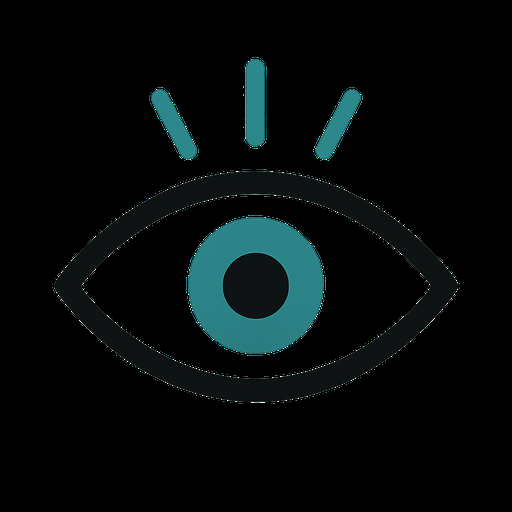
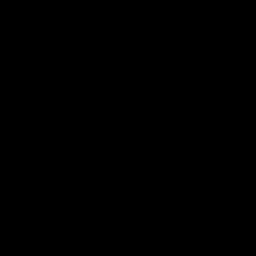
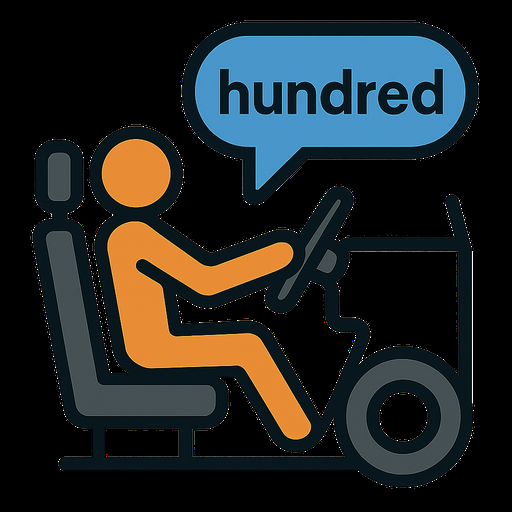
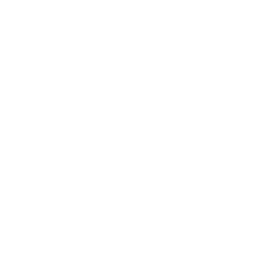
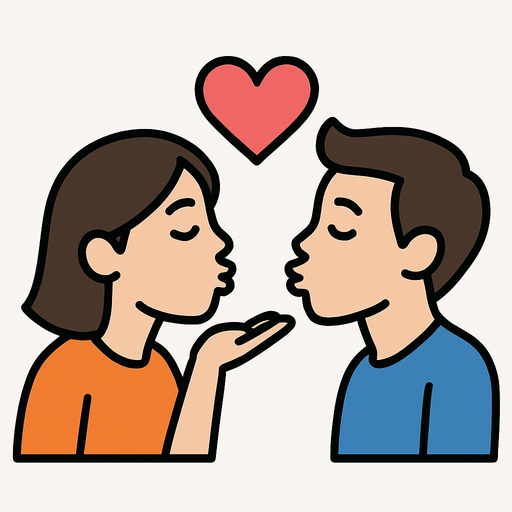
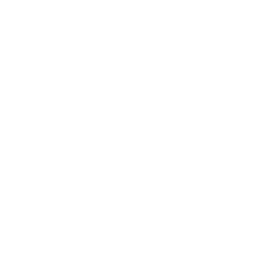
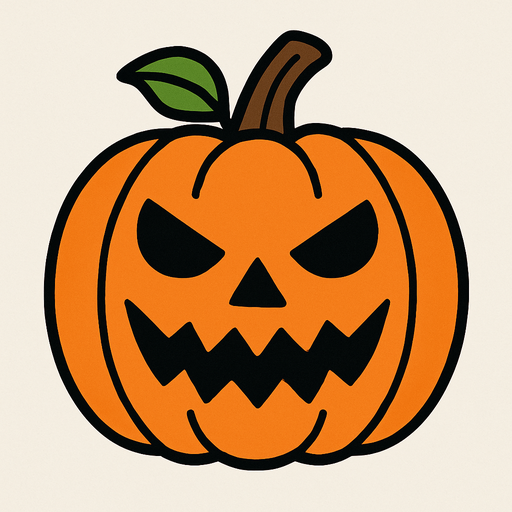
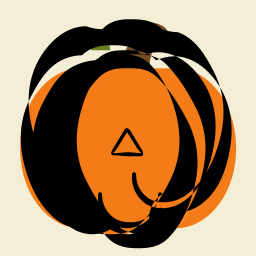
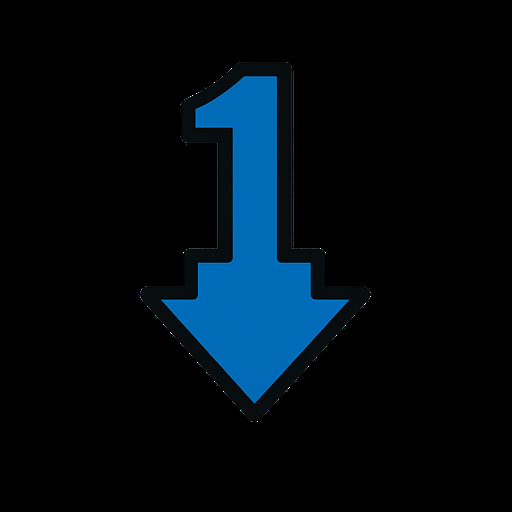
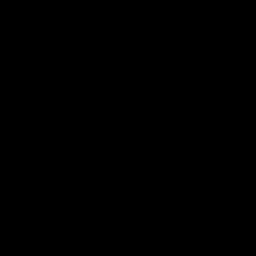
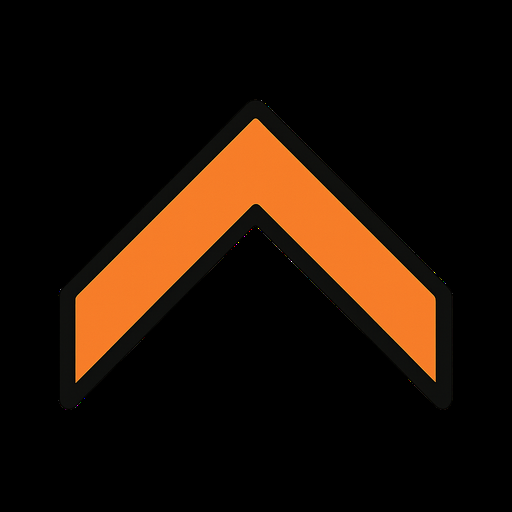
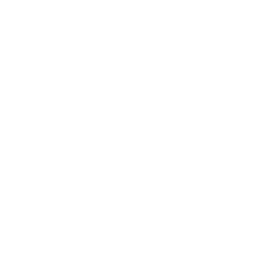

In [ ]:

# Process all PNGs in examples directory with on-the-fly display
import os
import torch
from IPython.display import display, HTML, clear_output
import base64
from io import BytesIO
import gc
from PIL import Image
from transformers import AutoModelForCausalLM, AutoProcessor
from starvector.data.util import process_and_rasterize_svg

def image_to_base64(img):
    """Convert PIL image to base64 string for HTML display"""
    buffered = BytesIO()
    img.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode()

def display_comparison(original_img, raster_img, svg_code, filename, index, total):
    """Display side-by-side comparison for a single image"""
    orig_b64 = image_to_base64(original_img)
    raster_b64 = image_to_base64(raster_img)
    
    # Truncate SVG code if too long for display
    display_svg = svg_code[:1000] + "..." if len(svg_code) > 1000 else svg_code
    
    html = f"""
    <div style="border: 2px solid #333; margin: 20px 0; padding: 15px; border-radius: 10px; background-color: #f9f9f9;">
        <h3 style="margin-top: 0; color: #333;">Image {index}/{total}: {filename}</h3>
        <div style="display: flex; gap: 20px; align-items: flex-start;">
            <div style="flex: 1; text-align: center;">
                <h4 style="margin-bottom: 10px; color: #555;">Original PNG</h4>
                <img src="data:image/png;base64,{orig_b64}" style="max-width: 300px; border: 1px solid #ddd; border-radius: 5px;">
                <p style="font-size: 12px; color: #666; margin-top: 5px;">Size: {original_img.size[0]}×{original_img.size[1]}</p>
            </div>
            <div style="flex: 1; text-align: center;">
                <h4 style="margin-bottom: 10px; color: #555;">Generated SVG (Rasterized)</h4>
                <img src="data:image/png;base64,{raster_b64}" style="max-width: 300px; border: 1px solid #ddd; border-radius: 5px;">
                <p style="font-size: 12px; color: #666; margin-top: 5px;">Size: {raster_img.size[0]}×{raster_img.size[1]}</p>
            </div>
            <div style="flex: 1;">
                <h4 style="margin-bottom: 10px; color: #555;">SVG Code</h4>
                <pre style="background-color: #f0f0f0; padding: 10px; border-radius: 5px; font-size: 10px; 
                           max-height: 300px; overflow: auto; white-space: pre-wrap; word-wrap: break-word; 
                           border: 1px solid #ddd;">{display_svg.replace('<', '&lt;').replace('>', '&gt;')}</pre>
                <p style="font-size: 12px; color: #666; margin-top: 5px;">Length: {len(svg_code)} chars</p>
            </div>
        </div>
    </div>
    """
    display(HTML(html))

def display_error(filename, error_msg, index, total):
    """Display error message for failed processing"""
    html = f"""
    <div style="border: 2px solid #d32f2f; margin: 20px 0; padding: 15px; border-radius: 10px; background-color: #ffebee;">
        <h3 style="margin-top: 0; color: #d32f2f;">Image {index}/{total}: {filename} - ERROR</h3>
        <p style="color: #d32f2f; font-weight: bold;">Error: {error_msg}</p>
    </div>
    """
    display(HTML(html))

# Clear CUDA cache before starting
torch.cuda.empty_cache()
gc.collect()

# Get all PNG files
example_dir = 'assets/examples1'
png_files = sorted([f for f in os.listdir(example_dir) if f.endswith('.png')])
print(f"Found {len(png_files)} PNG files to process")
print("=" * 60)

# Process each PNG and display immediately
for i, png_file in enumerate(png_files, 1):
    print(f"Processing {png_file} ({i}/{len(png_files)})...")
    
    try:
        # Load and process image
        image_path = os.path.join(example_dir, png_file)
        image_pil = Image.open(image_path)
        
        # Convert to RGB if needed (handles RGBA, grayscale, etc.)
        if image_pil.mode != 'RGB':
            image_pil = image_pil.convert('RGB')
        
        # Generate SVG
        image = processor(image_pil, return_tensors="pt")['pixel_values'].to(device)
        batch = {"image": image}
        
        raw_svg = starvector.generate_im2svg(batch, max_length=4000)[0]
        svg, raster_image = process_and_rasterize_svg(raw_svg)
        
        # Display comparison immediately
        display_comparison(image_pil, raster_image, svg, png_file, i, len(png_files))
        
        # Clear CUDA cache after each image
        torch.cuda.empty_cache()
        gc.collect()
        
        print(f"✓ Successfully processed {png_file}")
        
    except Exception as e:
        print(f"✗ Error processing {png_file}: {str(e)}")
        display_error(png_file, str(e), i, len(png_files))

print("=" * 60)
print(f"Completed processing {len(png_files)} images!")

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Found 5 PNG files to process

Processing Screenshot 2025-08-20 at 2.35.01 PM.png (1/5)...
  Generating SVG...
image.shape=torch.Size([1, 3, 384, 384])
image.shape=torch.Size([1, 3, 384, 384])
  Rasterizing SVG...


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



Processing Screenshot 2025-08-20 at 2.36.58 PM.png (2/5)...
  Generating SVG...
image.shape=torch.Size([1, 3, 384, 384])
image.shape=torch.Size([1, 3, 384, 384])
  Rasterizing SVG...


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



Processing Screenshot 2025-08-20 at 2.37.03 PM.png (3/5)...
  Generating SVG...
image.shape=torch.Size([1, 3, 384, 384])
image.shape=torch.Size([1, 3, 384, 384])
  Rasterizing SVG...


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



Processing Screenshot 2025-08-20 at 2.37.07 PM.png (4/5)...
  Generating SVG...
image.shape=torch.Size([1, 3, 384, 384])
image.shape=torch.Size([1, 3, 384, 384])
  Rasterizing SVG...


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.



Processing Screenshot 2025-08-20 at 2.37.10 PM.png (5/5)...
  Generating SVG...
image.shape=torch.Size([1, 3, 384, 384])
image.shape=torch.Size([1, 3, 384, 384])
  Rasterizing SVG...


Original PNG,Generated SVG (Rasterized),SVG Code
Screenshot 2025-08-20 at 2.35.01 PM.png,,<svg></svg>
Screenshot 2025-08-20 at 2.36.58 PM.png,,"<svg xmlns=""http://www.w3.org/2000/svg"" xmlns:xlink=""http://www.w3.org/1999/xlink"" width=""100pt"" height=""100pt"" viewBox=""0 0 100 100"" version=""1.1""> <g id=""surface62""> </g> </svg>"
Screenshot 2025-08-20 at 2.37.03 PM.png,,"<svg xmlns=""http://www.w3.org/2000/svg"" xmlns:xlink=""http://www.w3.org/1999/xlink"" width=""200pt"" height=""200pt"" viewBox=""0 0 200 200"" version=""1.1""> <g id=""surface68""> </g> </svg>"
Screenshot 2025-08-20 at 2.37.07 PM.png,,"<svg xmlns=""http://www.w3.org/2000/svg"" xmlns:xlink=""http://www.w3.org/1999/xlink"" width=""100pt"" height=""100pt"" viewBox=""0 0 100 100"" version=""1.1""> <g id=""surface74""> </g> </svg>"
Screenshot 2025-08-20 at 2.37.10 PM.png,,"<svg xmlns=""http://www.w3.org/2000/svg"" xmlns:xlink=""http://www.w3.org/1999/xlink"" width=""200pt"" height=""200pt"" viewBox=""0 0 200 200"" version=""1.1""> <g id=""surface80""> </g> </svg>"

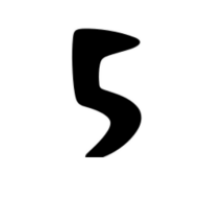
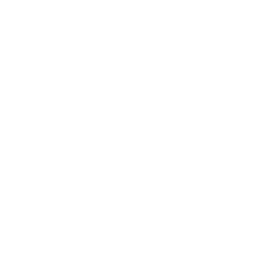
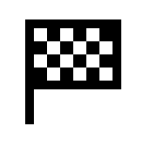
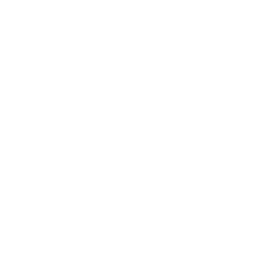
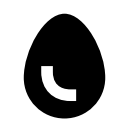
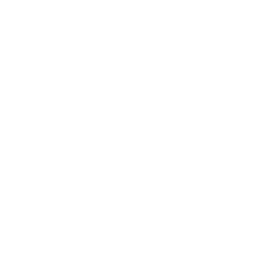
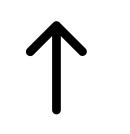
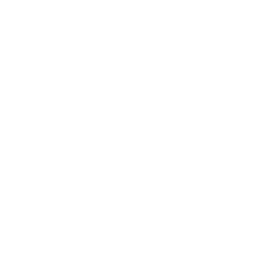
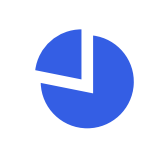
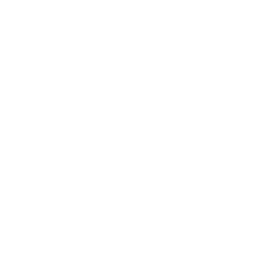

In [8]:

# Process all PNGs in examples directory
import os
import torch
from IPython.display import display, HTML
import base64
from io import BytesIO
import gc
from PIL import Image
from transformers import AutoModelForCausalLM, AutoProcessor
from starvector.data.util import process_and_rasterize_svg

def image_to_base64(img):
    buffered = BytesIO()
    img.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode()

# Clear CUDA cache before starting
torch.cuda.empty_cache()
gc.collect()

# Get all PNG files
example_dir = 'assets/examples4'
png_files = sorted([f for f in os.listdir(example_dir) if f.endswith('.png')])
print(f"Found {len(png_files)} PNG files to process")

# Create HTML table
html = """
<table style="border-collapse: collapse;">
    <tr>
        <th style="padding: 10px; border: 1px solid black;">Original PNG</th>
        <th style="padding: 10px; border: 1px solid black;">Generated SVG (Rasterized)</th>
        <th style="padding: 10px; border: 1px solid black;">SVG Code</th>
    </tr>
"""

# Process each PNG
for i, png_file in enumerate(png_files, 1):
    print(f"\nProcessing {png_file} ({i}/{len(png_files)})...")
    
    try:
        # Load and process image
        image_path = os.path.join(example_dir, png_file)
        image_pil = Image.open(image_path)
        
        # Convert to RGB if needed (handles RGBA, grayscale, etc.)
        if image_pil.mode != 'RGB':
            image_pil = image_pil.convert('RGB')
        
        # Generate SVG
        print("  Generating SVG...")
        image = processor(image_pil, return_tensors="pt")['pixel_values'].to(device)
        batch = {"image": image}
        
        raw_svg = starvector.generate_im2svg(batch, max_length=4000)[0]
        print("  Rasterizing SVG...")
        svg, raster_image = process_and_rasterize_svg(raw_svg)
        
        # Convert images to base64
        orig_b64 = image_to_base64(image_pil)
        raster_b64 = image_to_base64(raster_image)
        
        # Add to HTML table
        html += f"""
        <tr>
            <td style="padding: 10px; border: 1px solid black;">
                <img src="data:image/png;base64,{orig_b64}" style="max-width: 300px;">
                <br>
                <small>{png_file}</small>
            </td>
            <td style="padding: 10px; border: 1px solid black;">
                <img src="data:image/png;base64,{raster_b64}" style="max-width: 300px;">
            </td>
            <td style="padding: 10px; border: 1px solid black;">
                <pre style="text-align: left; max-height: 200px; overflow: auto; white-space: pre-wrap; word-wrap: break-word;">
                    {svg.replace('<', '&lt;').replace('>', '&gt;')}
                </pre>
            </td>
        </tr>
        """
        
        # Clear CUDA cache after each image
        torch.cuda.empty_cache()
        gc.collect()
        
    except Exception as e:
        print(f"Error processing {png_file}: {str(e)}")
        html += f"""
        <tr>
            <td colspan="3" style="padding: 10px; border: 1px solid black;">
                Error processing {png_file}: {str(e)}
            </td>
        </tr>
        """

html += "</table>"

# Display the table
display(HTML(html))


In [ ]:

# Process all PNGs in examples directory
import os
import torch
from IPython.display import display, HTML
import base64
from io import BytesIO
import gc
from PIL import Image
from transformers import AutoModelForCausalLM, AutoProcessor
from starvector.data.util import process_and_rasterize_svg

def image_to_base64(img):
    buffered = BytesIO()
    img.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode()

# Clear CUDA cache before starting
torch.cuda.empty_cache()
gc.collect()

# Get all PNG files
example_dir = 'assets/examples4'
png_files = sorted([f for f in os.listdir(example_dir) if f.endswith('.png')])
print(f"Found {len(png_files)} PNG files to process")

# Create HTML table
html = """
<table style="border-collapse: collapse;">
    <tr>
        <th style="padding: 10px; border: 1px solid black;">Original PNG</th>
        <th style="padding: 10px; border: 1px solid black;">Generated SVG (Rasterized)</th>
        <th style="padding: 10px; border: 1px solid black;">SVG Code</th>
    </tr>
"""

# Process each PNG
for i, png_file in enumerate(png_files, 1):
    print(f"\nProcessing {png_file} ({i}/{len(png_files)})...")
    
    try:
        # Load and process image
        image_path = os.path.join(example_dir, png_file)
        image_pil = Image.open(image_path)
        
        # Convert to RGB if needed (handles RGBA, grayscale, etc.)
        if image_pil.mode != 'RGB':
            image_pil = image_pil.convert('RGB')
        
        # Generate SVG
        # print("  Generating SVG...")
        image = processor(image_pil, return_tensors="pt")['pixel_values'].to(device)
        batch = {"image": image}
        
        raw_svg = starvector.generate_im2svg(batch, max_length=4000)[0]
        # print("  Rasterizing SVG...")
        svg, raster_image = process_and_rasterize_svg(raw_svg)
        
        # Convert images to base64
        orig_b64 = image_to_base64(image_pil)
        raster_b64 = image_to_base64(raster_image)
        
        # Add to HTML table
        html += f"""
        <tr>
            <td style="padding: 10px; border: 1px solid black;">
                <img src="data:image/png;base64,{orig_b64}" style="max-width: 300px;">
                <br>
                <small>{png_file}</small>
            </td>
            <td style="padding: 10px; border: 1px solid black;">
                <img src="data:image/png;base64,{raster_b64}" style="max-width: 300px;">
            </td>
            <td style="padding: 10px; border: 1px solid black;">
                <pre style="text-align: left; max-height: 200px; overflow: auto; white-space: pre-wrap; word-wrap: break-word;">
                    {svg.replace('<', '&lt;').replace('>', '&gt;')}
                </pre>
            </td>
        </tr>
        """
        
        # Clear CUDA cache after each image
        torch.cuda.empty_cache()
        gc.collect()
        
    except Exception as e:
        print(f"Error processing {png_file}: {str(e)}")
        html += f"""
        <tr>
            <td colspan="3" style="padding: 10px; border: 1px solid black;">
                Error processing {png_file}: {str(e)}
            </td>
        </tr>
        """

html += "</table>"

# Display the table
display(HTML(html))
